In [29]:
# *Dataset에 대해 추가 조사 필요
# IMDB 데이터셋
# IMDB(Internet Movie Database)는 양극단의 5만 개의 리뷰로 이루어진 데이터
# 25,000개의 훈련 데이터, 25,000개의 테스트 데이터로 이루어진 데이터
# IMDb (Internet Movie Database) is an online database of information related 
# to films, television programs, home videos and video games, and streaming 
# content online -- including cast, production crew and personal biographies,
# plot summaries, trivia,fan reviews and ratings.
# Owner : Amazon
# Created by Col Needham
# Subsidiaries : Box Office Mojo
# source url : https://en.wikipedia.org/wiki/IMDb

#- 실제 데이터에 대한 상세 기술
# Out [31]

#- 예측하고자 하는 방법/방향 기술
# 어떤 샘플 데이터에 대해 긍정적인 확인을 예측 

#- 학습을 위해 데이터가 어떻게 가공/처리 되었는지 기술
# 정수 시퀀스를 이진 행렬로 인코딩
# 넘파이를 이용해서 레이블 벡터로 변환

# - 사용된 모델의 입력층과 출력층에 대한 기술
# 입력층 : 16차원의 relu 활성화 함수를 사용해 Fully Connected Layer 구축
# 출력층 : 통계적인 결과를 획득하기 위해서 sigmoid 함수 사용


In [30]:
# 코드 3-1 IMDB 데이터셋 로드하기
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [31]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
# 코드 3-2 정수 시퀸스를 이진 행렬로 인코딩하기
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# 레이블 벡터 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
# 코드 3-3 모델 정의하기
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

W0728 12:42:28.843778 14092 deprecation_wrapper.py:119] From C:\Users\ehddn\.conda\envs\venv\lib\site-packages\keras-2.2.4-py3.7.egg\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0728 12:42:28.899700 14092 deprecation_wrapper.py:119] From C:\Users\ehddn\.conda\envs\venv\lib\site-packages\keras-2.2.4-py3.7.egg\keras\backend\tensorflow_backend.py:529: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0728 12:42:28.917550 14092 deprecation_wrapper.py:119] From C:\Users\ehddn\.conda\envs\venv\lib\site-packages\keras-2.2.4-py3.7.egg\keras\backend\tensorflow_backend.py:4420: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [6]:
# 코드 3-4 모델 컴파일하기
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

W0728 12:43:00.164397 14092 deprecation_wrapper.py:119] From C:\Users\ehddn\.conda\envs\venv\lib\site-packages\keras-2.2.4-py3.7.egg\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0728 12:43:00.185298 14092 deprecation_wrapper.py:119] From C:\Users\ehddn\.conda\envs\venv\lib\site-packages\keras-2.2.4-py3.7.egg\keras\backend\tensorflow_backend.py:3645: The name tf.log is deprecated. Please use tf.math.log instead.

W0728 12:43:00.193279 14092 deprecation.py:323] From C:\Users\ehddn\.conda\envs\venv\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
# 코드 3-5 옵티마이저 설정하기
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
# 코드 3-6 손실과 측정을 함수 객체로 지정하기
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [9]:
# 코드 3-7 검증 세트 준비하기
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
# 코드 3-8 모델 훈련하기
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

W0728 12:43:17.292942 14092 deprecation_wrapper.py:119] From C:\Users\ehddn\.conda\envs\venv\lib\site-packages\keras-2.2.4-py3.7.egg\keras\backend\tensorflow_backend.py:1021: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.5086 - binary_accuracy: 0.7843 - val_loss: 0.3869 - val_binary_accuracy: 0.8593
Epoch 2/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.2965 - binary_accuracy: 0.9057 - val_loss: 0.3083 - val_binary_accuracy: 0.8790
Epoch 3/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.2188 - binary_accuracy: 0.9286 - val_loss: 0.2900 - val_binary_accuracy: 0.8836
Epoch 4/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.1742 - binary_accuracy: 0.9423 - val_loss: 0.2774 - val_binary_accuracy: 0.8876
Epoch 5/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.1368 - binary_accuracy: 0.9569 - val_loss: 0.3147 - val_binary_accuracy: 0.8780
Epoch 6/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.1143 - binary_accuracy: 0.9651 - val_loss: 0.3071 - val_bi

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

In [18]:
import matplotlib.pyplot as plt

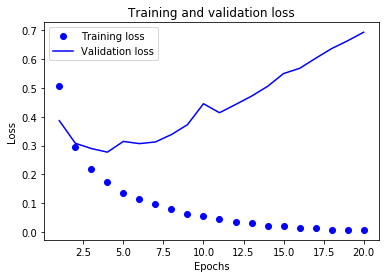

<Figure size 432x288 with 0 Axes>

In [23]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#plt.show()
# 변경파트
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('fig1.png', dpi=100)

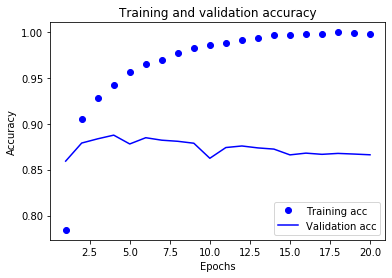

<Figure size 432x288 with 0 Axes>

In [24]:
plt.clf()   # 그래프를 초기화합니다
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#plt.show()
# 변경파트
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('fig1.png', dpi=100)

In [25]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 91us/step - loss: 0.4507 - acc: 0.8150
Epoch 2/4
25000/25000 [==============================] - 2s 75us/step - loss: 0.2603 - acc: 0.9090
Epoch 3/4
25000/25000 [==============================] - 2s 75us/step - loss: 0.2016 - acc: 0.9298
Epoch 4/4
25000/25000 [==============================] - 3s 116us/step


In [26]:
results

[0.33114249232292176, 0.86872]

In [27]:
model.predict(x_test)

array([[0.12770528],
       [0.9998594 ],
       [0.7310913 ],
       ...,
       [0.09610227],
       [0.04223877],
       [0.3105859 ]], dtype=float32)